In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,20241.089844,37872380889
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,19701.210938,36389011503
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,19772.583984,30123362273


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


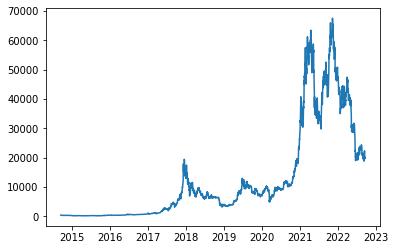

In [12]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [13]:
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

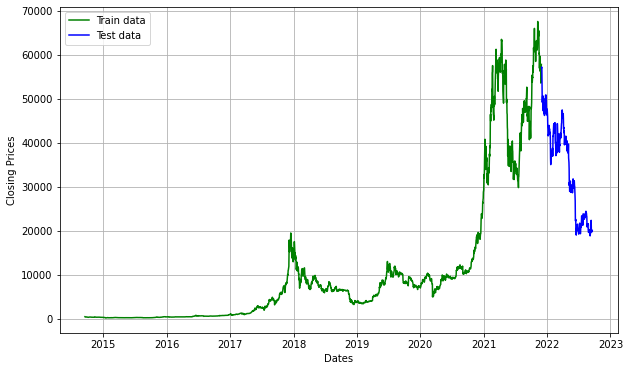

In [14]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label = 'Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label = "Test data")
plt.legend()

In [15]:
model_predictions = []
n_test_obser = len(testing_data)

In [23]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

In [24]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2923
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23689.614
Date:                Sun, 18 Sep 2022   AIC                          47389.227
Time:                        07:37:01   BIC                          47419.127
Sample:                             0   HQIC                         47399.997
                               - 2923                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0267      0.010     -2.743      0.006      -0.046      -0.008
ar.L2          0.0059      0.009      0.632      0.528      -0.012       0.024
ar.L3          0.0188      0.010      1.898      0.0

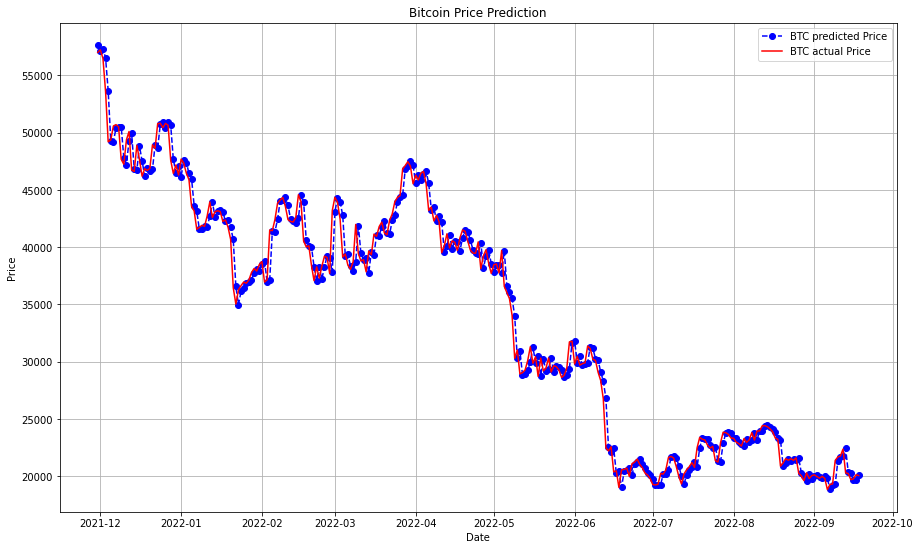

In [25]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue' , marker = 'o' , linestyle = 'dashed' , label = 'BTC predicted Price')
plt.plot(date_range, testing_data , color = 'red',  label = 'BTC actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
mape = np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape))

MAPE: 0.39476831107382604
